## Importing Required Libraries

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, PowerTransformer, FunctionTransformer, Normalizer, MaxAbsScaler, QuantileTransformer
import statistics
import scipy.stats as stats
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

## Reading the Dataset

In [2]:
census_income = pd.read_csv("../Data/census_income.csv")
census_income

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Data Quality Check

In [3]:
census_income.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
for i in census_income.columns:
    print(i," ",set(census_income[i]))
    print()

Age   {17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 90}

Workclass   {' Private', ' Local-gov', ' Self-emp-not-inc', ' ?', ' State-gov', ' Self-emp-inc', ' Federal-gov', ' Without-pay', ' Never-worked'}

Fnlwgt   {262153, 262158, 131088, 131091, 393248, 131117, 393264, 262196, 262208, 262233, 262241, 262244, 262245, 131178, 131180, 262280, 393354, 393357, 262285, 393360, 131224, 131230, 393376, 131239, 131258, 262345, 131275, 262352, 131288, 131298, 131302, 131309, 131310, 262402, 393480, 262409, 262425, 262439, 262446, 131379, 262478, 131414, 131417, 131425, 131435, 262511, 262515, 131459, 131461, 131463, 131473, 262552, 262570, 131519, 262601, 393673, 131534, 262617, 131552, 131568, 393712, 262642, 393715, 131573, 393728, 131584, 262656, 131588,

In [5]:
for i in census_income.columns:
    print(i, " ",census_income[i].isna().sum())

Age   0
Workclass   0
Fnlwgt   0
Education   0
Education_num   0
Marital_status   0
Occupation   0
Relationship   0
Race   0
Sex   0
Capital_gain   0
Capital_loss   0
Hours_per_week   0
Native_country   0
Income   0


In [6]:
for i in census_income.columns:
    print(i," ",(census_income[i] == ' ?').sum())

Age   0
Workclass   1836
Fnlwgt   0
Education   0
Education_num   0
Marital_status   0
Occupation   1843
Relationship   0
Race   0
Sex   0
Capital_gain   0
Capital_loss   0
Hours_per_week   0
Native_country   583
Income   0


In [7]:
print("Capital_gain")
print()
number_rows_with_zeros = (census_income['Capital_gain'] == 0).sum()
print("Number of rows with zeros = ", number_rows_with_zeros)
print("Number of non zero rows = ", census_income.shape[0] - number_rows_with_zeros)

print()


print("Capital_loss")
print()
number_rows_with_zeros = (census_income['Capital_loss'] == 0).sum()
print("Number of rows with zeros = ", number_rows_with_zeros)
print("Number of non zero rows = ", census_income.shape[0] - number_rows_with_zeros)

Capital_gain

Number of rows with zeros =  29849
Number of non zero rows =  2711

Capital_loss

Number of rows with zeros =  31041
Number of non zero rows =  1519


## Data Imputation

In [8]:
census_income_2 = census_income.copy()
census_income_2['Workclass'] = census_income_2['Workclass'].replace(' ?', None)
census_income_2['Occupation'] = census_income_2['Occupation'].replace(' ?', None)
census_income_2['Native_country'] = census_income_2['Native_country'].replace(' ?', None)

census_income_2['Workclass'].fillna(census_income_2['Workclass'].mode()[0], inplace=True)
census_income_2['Occupation'].fillna(census_income_2['Occupation'].mode()[0], inplace=True)
census_income_2['Native_country'].fillna(census_income_2['Native_country'].mode()[0], inplace=True)

## Data Wrangling

In [9]:
census_income_2['Relationship'] = census_income_2['Relationship'].replace(' Husband', 'Spouse')
census_income_2['Relationship'] = census_income_2['Relationship'].replace(' Wife', 'Spouse')

## Exploratory Data Analysis

## Univariate Analysis

C:\Users\Dev\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

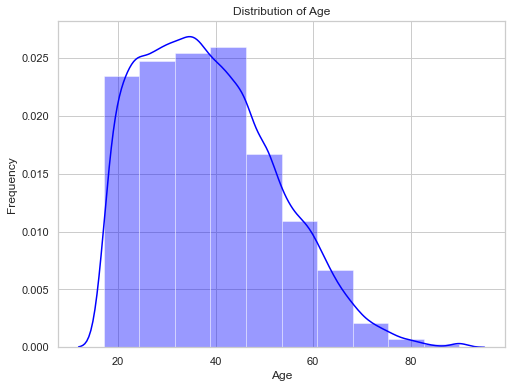

In [10]:
sns.set(style="whitegrid")  # Optional: Set the style of the plot

plt.figure(figsize=(8, 6))  # Optional: Set the size of the plot

sns.distplot(census_income_2['Age'], kde=True, bins=10, color='blue')  # You can adjust the number of bins as needed

plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

C:\Users\Dev\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

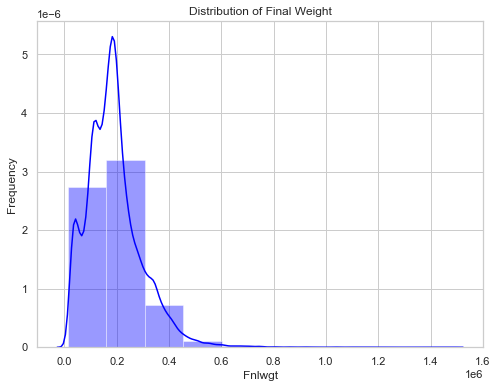

In [11]:
sns.set(style="whitegrid")  # Optional: Set the style of the plot

plt.figure(figsize=(8, 6))  # Optional: Set the size of the plot

sns.distplot(census_income_2['Fnlwgt'], kde=True, bins=10, color='blue')  # You can adjust the number of bins as needed

plt.title('Distribution of Final Weight')
plt.xlabel('Fnlwgt')
plt.ylabel('Frequency')

C:\Users\Dev\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

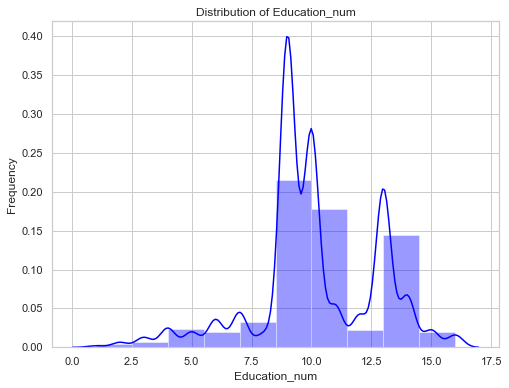

In [12]:
sns.set(style="whitegrid")  # Optional: Set the style of the plot

plt.figure(figsize=(8, 6))  # Optional: Set the size of the plot

sns.distplot(census_income_2['Education_num'], kde=True, bins=10, color='blue')  # You can adjust the number of bins as needed

plt.title('Distribution of Education_num')
plt.xlabel('Education_num')
plt.ylabel('Frequency')

C:\Users\Dev\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

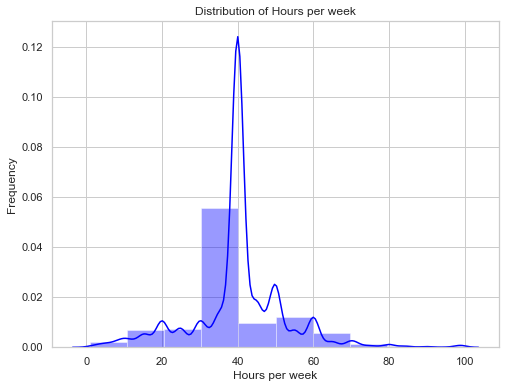

In [13]:
sns.set(style="whitegrid")  # Optional: Set the style of the plot

plt.figure(figsize=(8, 6))  # Optional: Set the size of the plot

sns.distplot(census_income_2['Hours_per_week'], kde=True, bins=10, color='blue')  # You can adjust the number of bins as needed

plt.title('Distribution of Hours per week')
plt.xlabel('Hours per week')
plt.ylabel('Frequency')

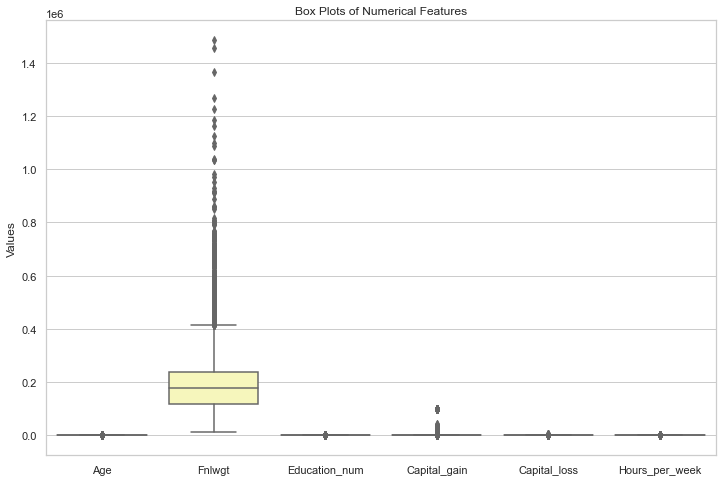

In [14]:
sns.set(style="whitegrid")  # Optional: Set the style of the plot

plt.figure(figsize=(12, 8))  # Optional: Set the size of the plot

sns.boxplot(data=census_income_2, palette="Set3")  # You can customize the color palette as needed

plt.title('Box Plots of Numerical Features')
plt.ylabel('Values')

plt.show()

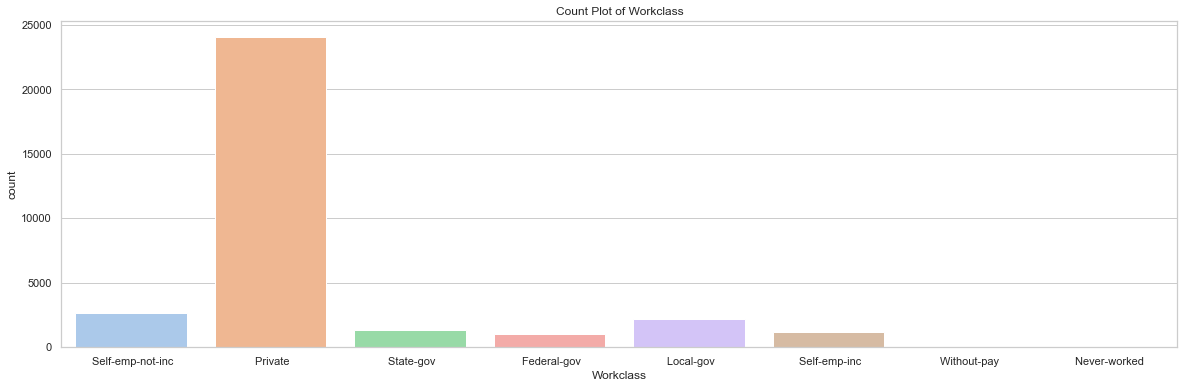

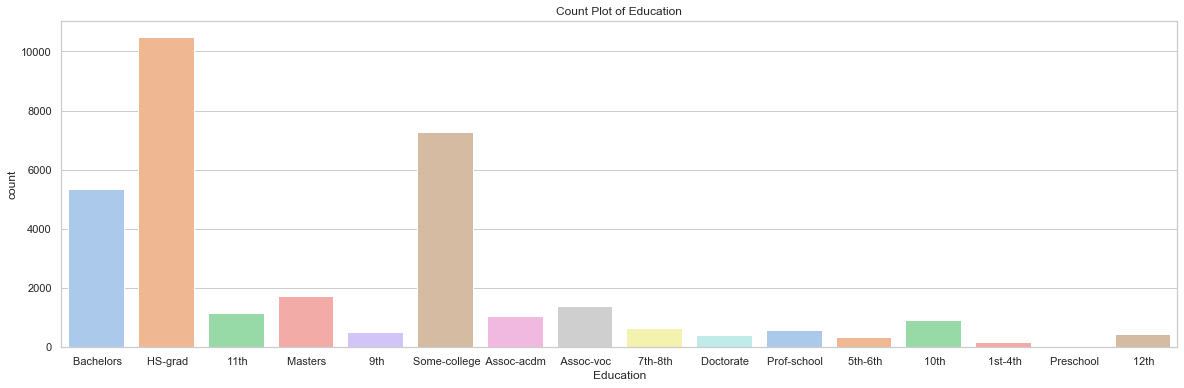

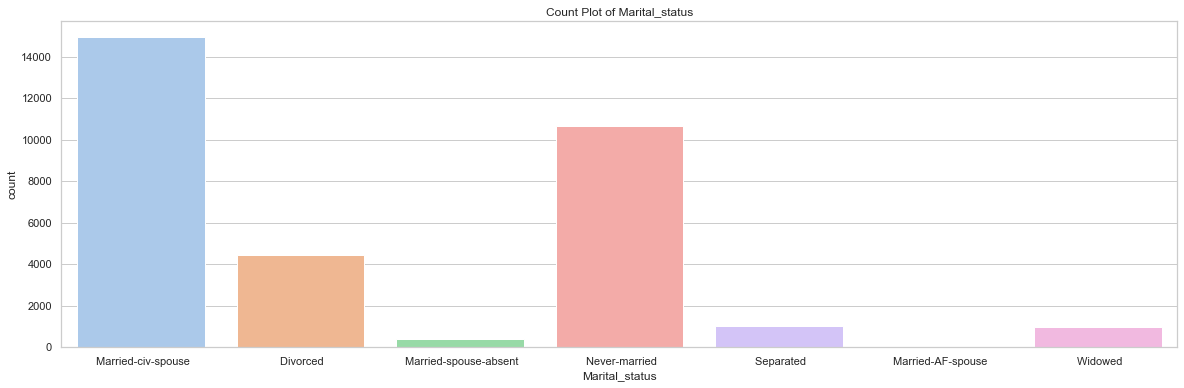

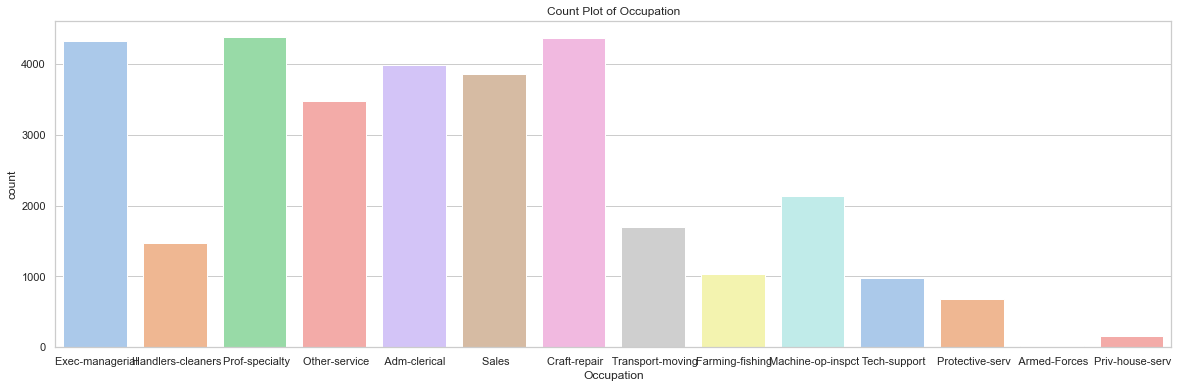

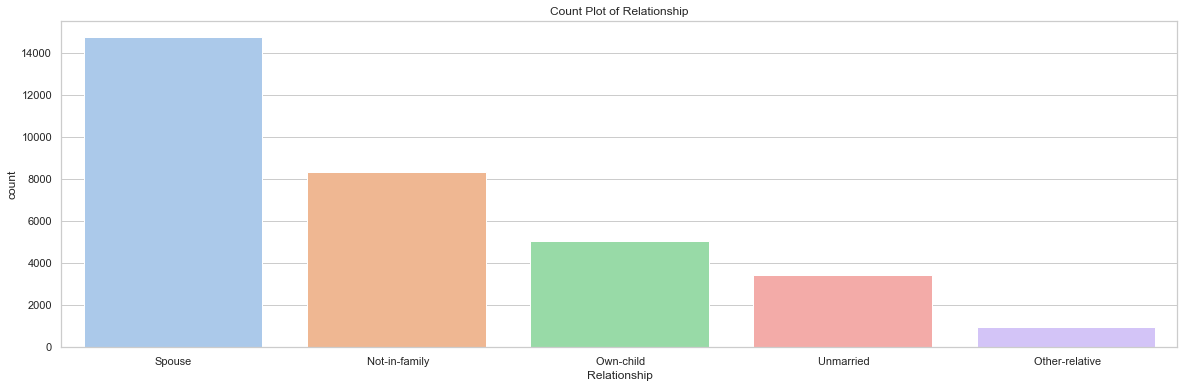

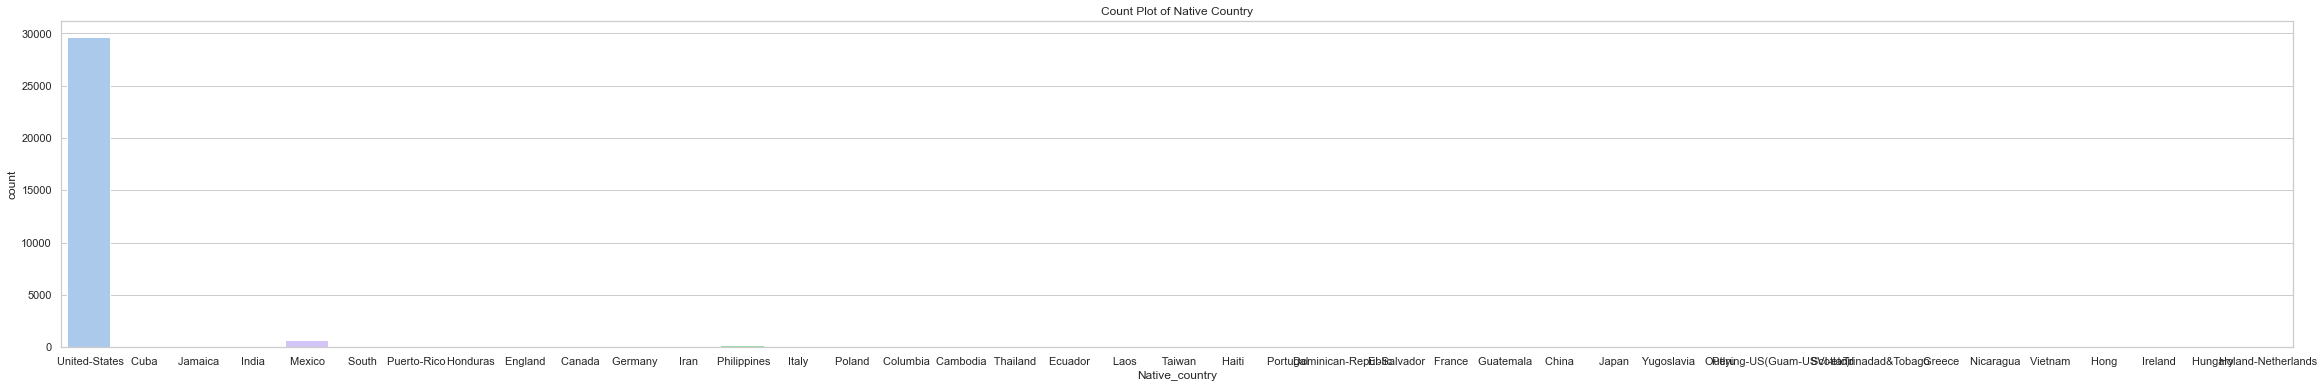

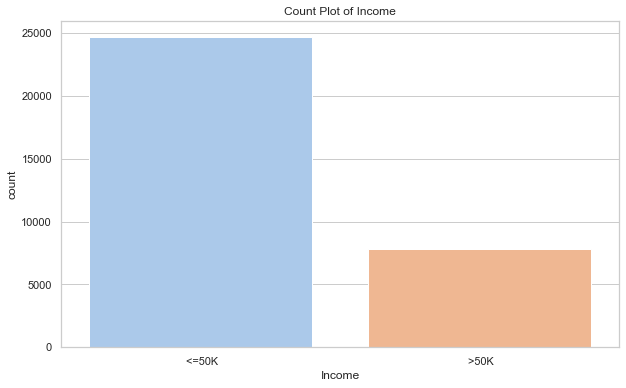

In [15]:
sns.set(style="whitegrid")  # Optional: Set the style of the plot

plt.figure(figsize=(20, 6))  # Optional: Set the size of the plot


sns.countplot(x='Workclass', data=census_income_2, palette="pastel")
plt.title('Count Plot of Workclass')
plt.show()

sns.set(style="whitegrid")  # Optional: Set the style of the plot

plt.figure(figsize=(20, 6)) 
sns.countplot(x='Education', data=census_income_2, palette="pastel")
plt.title('Count Plot of Education')
plt.show()

sns.set(style="whitegrid")  # Optional: Set the style of the plot

plt.figure(figsize=(20, 6)) 
sns.countplot(x='Marital_status', data=census_income_2, palette="pastel")
plt.title('Count Plot of Marital_status')
plt.show()

sns.set(style="whitegrid")  # Optional: Set the style of the plot

plt.figure(figsize=(20, 6)) 
sns.countplot(x='Occupation', data=census_income_2, palette="pastel")
plt.title('Count Plot of Occupation')
plt.show()

sns.set(style="whitegrid")  # Optional: Set the style of the plot

plt.figure(figsize=(20, 6)) 
sns.countplot(x='Relationship', data=census_income_2, palette="pastel")
plt.title('Count Plot of Relationship')
plt.show()


sns.set(style="whitegrid")  # Optional: Set the style of the plot

plt.figure(figsize=(40, 6)) 
sns.countplot(x='Native_country', data=census_income_2, palette="pastel")
plt.title('Count Plot of Native Country')
plt.show()

sns.set(style="whitegrid")  # Optional: Set the style of the plot

plt.figure(figsize=(10, 6)) 
sns.countplot(x='Income', data=census_income_2, palette="pastel")
plt.title('Count Plot of Income')
plt.show()

## Bivariate Analysis

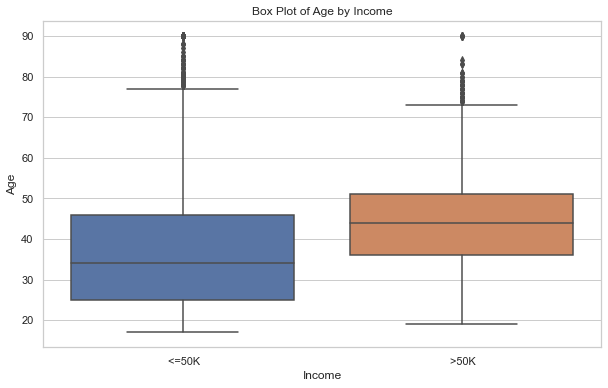

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Income', y='Age', data=census_income_2)
plt.title('Box Plot of Age by Income')
plt.show()

Income              <=50K   >50K
Workclass                       
 Federal-gov          627    375
 Local-gov           1573    631
 Never-worked           7      0
 Private            18991   5103
 Self-emp-inc         547    630
 Self-emp-not-inc    1942    746
 State-gov           1017    356
 Without-pay           15      0


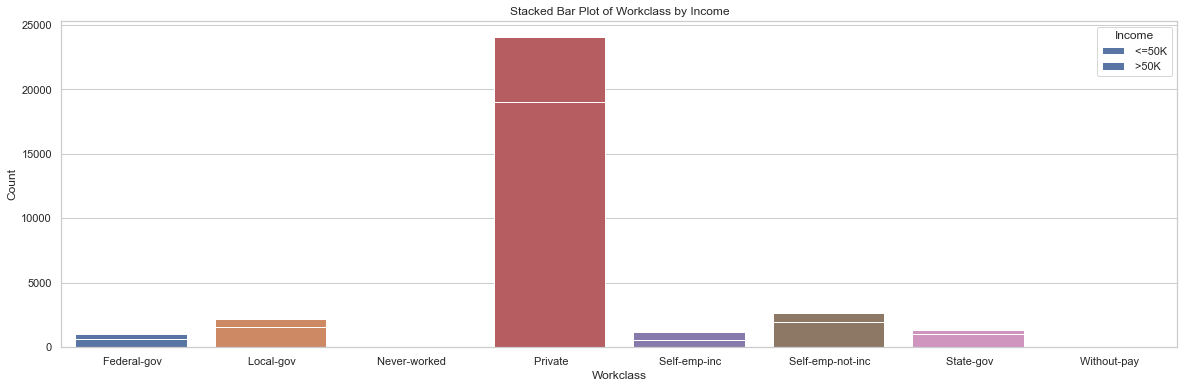

In [17]:
# Create a contingency table (cross-tabulation) for the two categorical variables
cross_tab = pd.crosstab(census_income_2['Workclass'], census_income_2['Income'])
print(cross_tab)
# Plot a stacked bar plot
plt.figure(figsize=(20, 6))
sns.barplot(x=cross_tab.index, y=cross_tab[' <=50K'], label=' <=50K')
sns.barplot(x=cross_tab.index, y=cross_tab[' >50K'], bottom=cross_tab[' <=50K'], label=' >50K')

plt.title('Stacked Bar Plot of Workclass by Income')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.legend(title='Income')
plt.show()

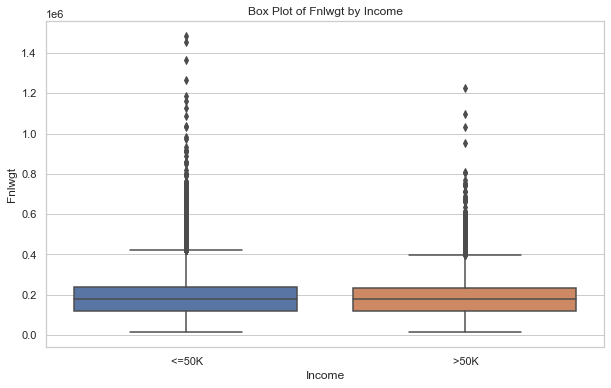

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Income', y='Fnlwgt', data=census_income_2)
plt.title('Box Plot of Fnlwgt by Income')
plt.show()

Income          <=50K   >50K
Education                   
 10th             871     62
 11th            1115     60
 12th             400     33
 1st-4th          162      6
 5th-6th          317     16
 7th-8th          606     40
 9th              487     27
 Assoc-acdm       802    265
 Assoc-voc       1021    361
 Bachelors       3133   2221
 Doctorate        107    306
 HS-grad         8826   1675
 Masters          764    959
 Preschool         51      0
 Prof-school      153    423
 Some-college    5904   1387


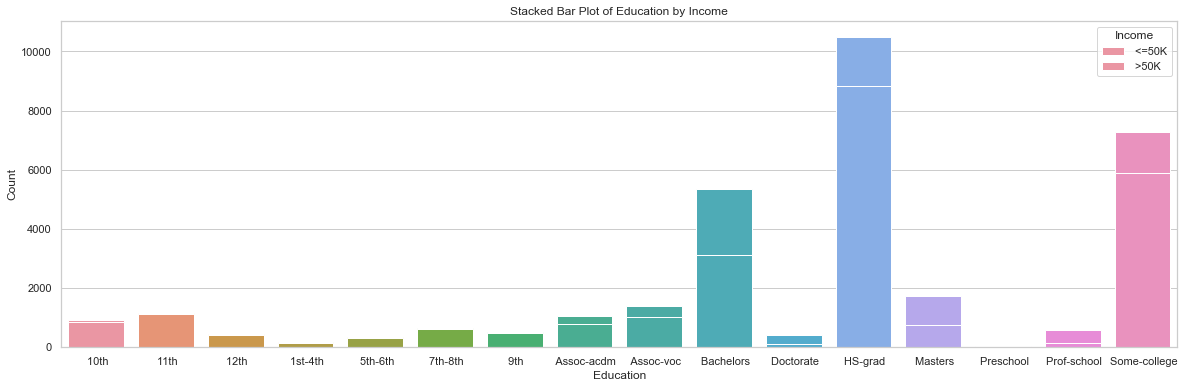

In [19]:
# Create a contingency table (cross-tabulation) for the two categorical variables
cross_tab = pd.crosstab(census_income_2['Education'], census_income_2['Income'])
print(cross_tab)
# Plot a stacked bar plot
plt.figure(figsize=(20, 6))
sns.barplot(x=cross_tab.index, y=cross_tab[' <=50K'], label=' <=50K')
sns.barplot(x=cross_tab.index, y=cross_tab[' >50K'], bottom=cross_tab[' <=50K'], label=' >50K')

plt.title('Stacked Bar Plot of Education by Income')
plt.xlabel('Education')
plt.ylabel('Count')
plt.legend(title='Income')
plt.show()

Income                   <=50K   >50K
Marital_status                       
 Divorced                 3980    463
 Married-AF-spouse          13     10
 Married-civ-spouse       8284   6692
 Married-spouse-absent     384     34
 Never-married           10191    491
 Separated                 959     66
 Widowed                   908     85


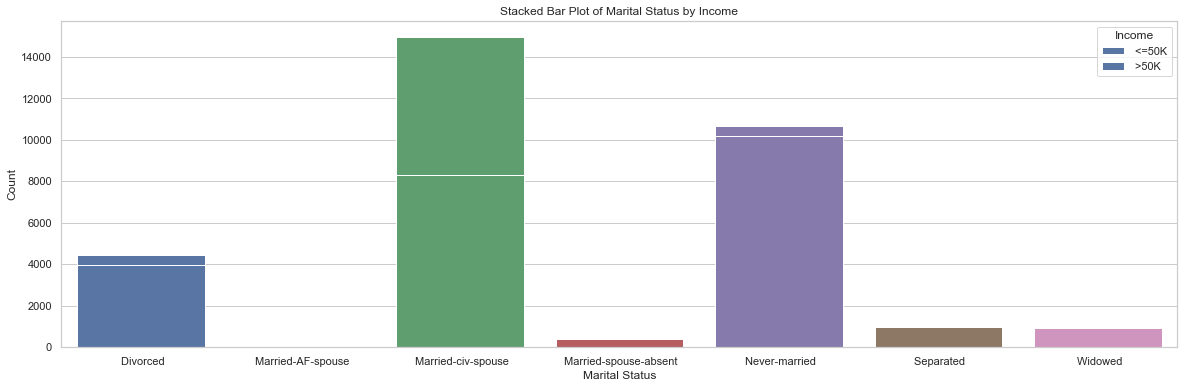

In [20]:
# Create a contingency table (cross-tabulation) for the two categorical variables
cross_tab = pd.crosstab(census_income_2['Marital_status'], census_income_2['Income'])
print(cross_tab)
# Plot a stacked bar plot
plt.figure(figsize=(20, 6))
sns.barplot(x=cross_tab.index, y=cross_tab[' <=50K'], label=' <=50K')
sns.barplot(x=cross_tab.index, y=cross_tab[' >50K'], bottom=cross_tab[' <=50K'], label=' >50K')

plt.title('Stacked Bar Plot of Marital Status by Income')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Income')
plt.show()

Income               <=50K   >50K
Occupation                       
 Adm-clerical         3448    533
 Armed-Forces            9      1
 Craft-repair         3412    952
 Exec-managerial      2323   1994
 Farming-fishing       915    123
 Handlers-cleaners    1373     98
 Machine-op-inspct    1871    263
 Other-service        3311    159
 Priv-house-serv       158      1
 Prof-specialty       2502   1884
 Protective-serv       470    213
 Sales                2861   1002
 Tech-support          691    290
 Transport-moving     1375    328


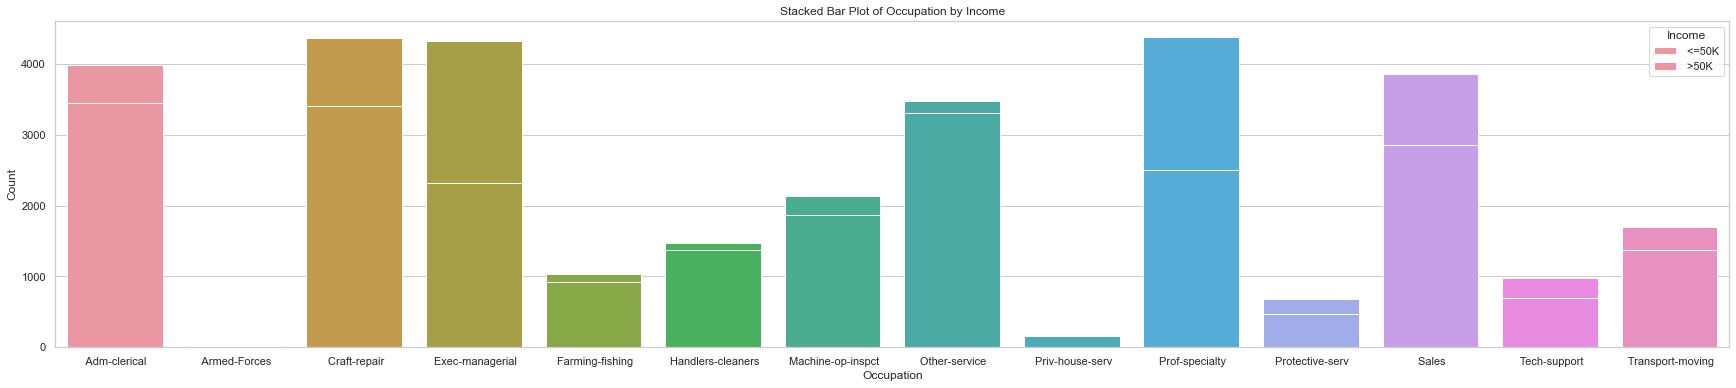

In [21]:
# Create a contingency table (cross-tabulation) for the two categorical variables
cross_tab = pd.crosstab(census_income_2['Occupation'], census_income_2['Income'])
print(cross_tab)
# Plot a stacked bar plot
plt.figure(figsize=(30, 6))
sns.barplot(x=cross_tab.index, y=cross_tab[' <=50K'], label=' <=50K')
sns.barplot(x=cross_tab.index, y=cross_tab[' >50K'], bottom=cross_tab[' <=50K'], label=' >50K')

plt.title('Stacked Bar Plot of Occupation by Income')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.legend(title='Income')
plt.show()

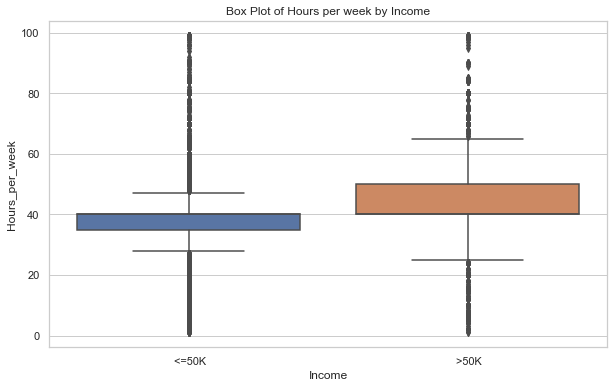

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Income', y='Hours_per_week', data=census_income_2)
plt.title('Box Plot of Hours per week by Income')
plt.show()

Income                        <=50K   >50K
Native_country                            
 Cambodia                        13      7
 Canada                          84     40
 China                           56     21
 Columbia                        59      2
 Cuba                            72     25
 Dominican-Republic              71      3
 Ecuador                         24      4
 El-Salvador                    100      9
 England                         62     31
 France                          17     12
 Germany                         96     45
 Greece                          22      8
 Guatemala                       63      3
 Haiti                           41      4
 Holand-Netherlands               1      0
 Honduras                        12      1
 Hong                            14      6
 Hungary                         10      3
 India                           61     40
 Iran                            25     18
 Ireland                         19      5
 Italy     

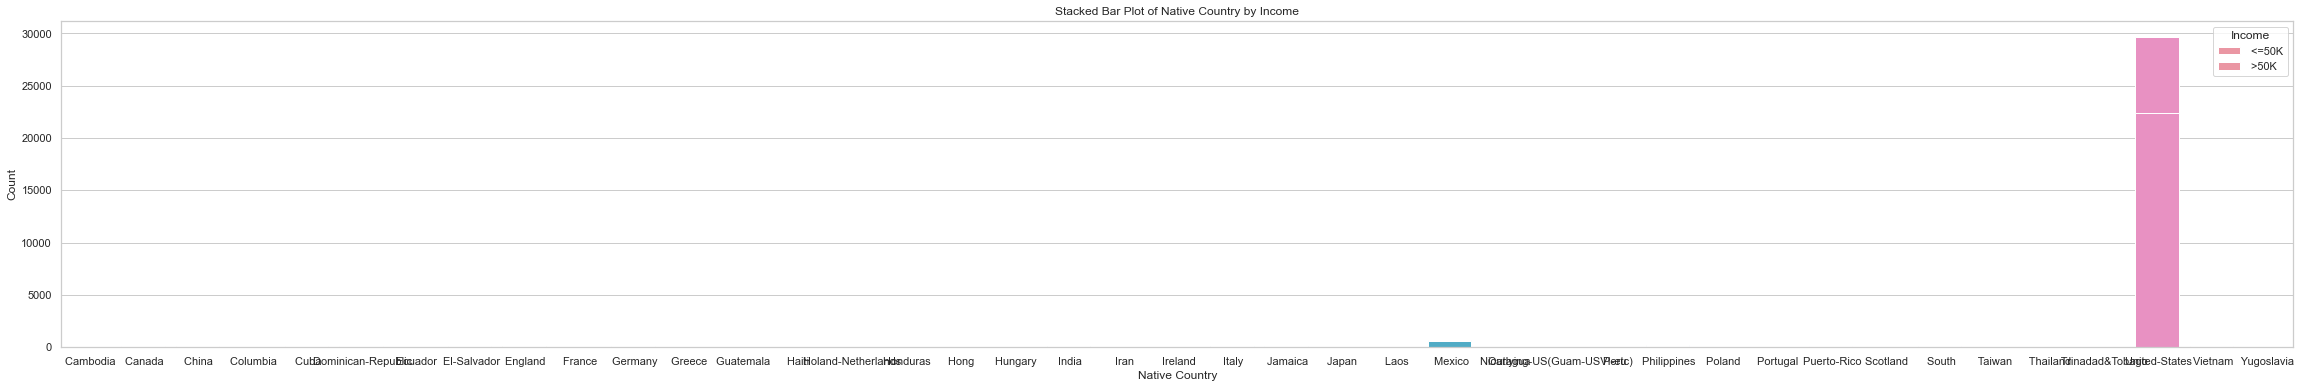

In [23]:
# Create a contingency table (cross-tabulation) for the two categorical variables
cross_tab = pd.crosstab(census_income_2['Native_country'], census_income_2['Income'])
print(cross_tab)
# Plot a stacked bar plot
plt.figure(figsize=(40, 6))
sns.barplot(x=cross_tab.index, y=cross_tab[' <=50K'], label=' <=50K')
sns.barplot(x=cross_tab.index, y=cross_tab[' >50K'], bottom=cross_tab[' <=50K'], label=' >50K')

plt.title('Stacked Bar Plot of Native Country by Income')
plt.xlabel('Native Country')
plt.ylabel('Count')
plt.legend(title='Income')
plt.show()

## Feature Engineering

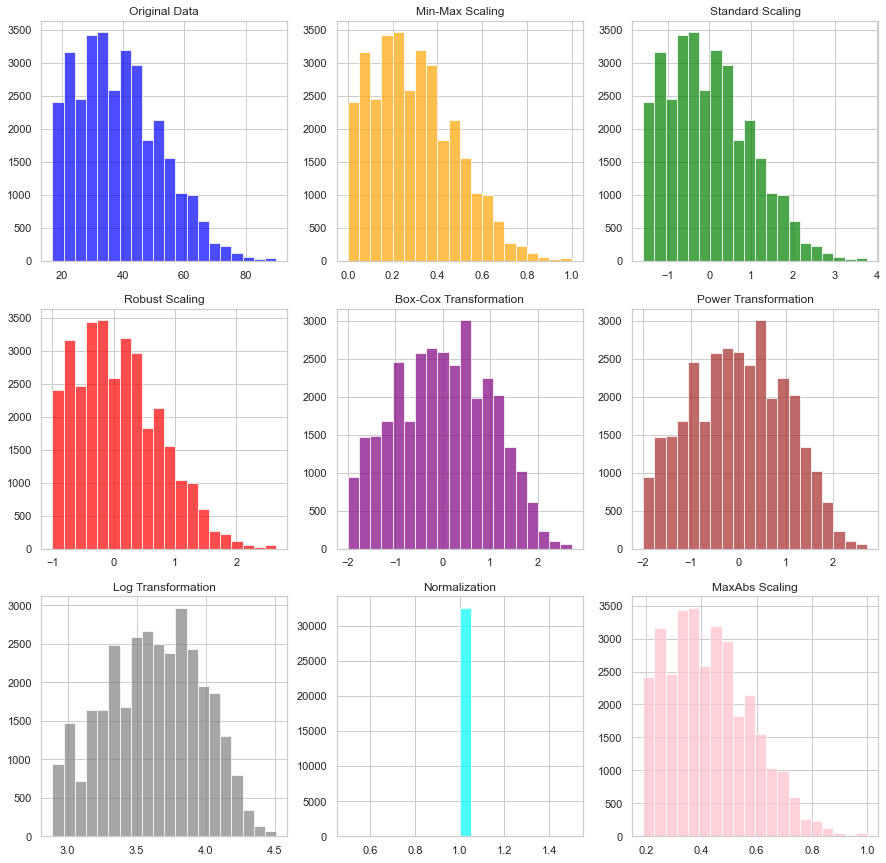

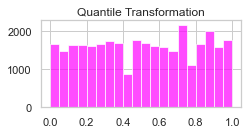

In [24]:
def plot_transformations(column_data):
    # Create a DataFrame with the input column
    df = pd.DataFrame({ 'Original': column_data })

    # Min-Max Scaling
    minmax_scaler = MinMaxScaler()
    df['MinMaxScaled'] = minmax_scaler.fit_transform(df[['Original']])

    # Standard Scaling
    standard_scaler = StandardScaler()
    df['StandardScaled'] = standard_scaler.fit_transform(df[['Original']])

    # Robust Scaling
    robust_scaler = RobustScaler()
    df['RobustScaled'] = robust_scaler.fit_transform(df[['Original']])

    # Box-Cox Transformation
    boxcox_transformer = PowerTransformer(method='box-cox')
    df['BoxCoxTransformed'] = boxcox_transformer.fit_transform(df[['Original']])

    # Power Transformation
    power_transformer = PowerTransformer(method='yeo-johnson')
    df['PowerTransformed'] = power_transformer.fit_transform(df[['Original']])

    # Log Transformation
    log_transformer = FunctionTransformer(np.log1p, inverse_func=np.expm1)
    df['LogTransformed'] = log_transformer.transform(df[['Original']])

    # Normalization
    normalizer = Normalizer()
    df['Normalized'] = normalizer.fit_transform(df[['Original']])

    # MaxAbs Scaling
    maxabs_scaler = MaxAbsScaler()
    df['MaxAbsScaled'] = maxabs_scaler.fit_transform(df[['Original']])

    # Quantile Transformation
    quantile_transformer = QuantileTransformer(output_distribution='uniform')
    df['QuantileTransformed'] = quantile_transformer.fit_transform(df[['Original']])

    # Plotting
    plt.figure(figsize=(15, 15))
    
    # Original data
    plt.subplot(3, 3, 1)
    plt.hist(df['Original'], bins=20, color='blue', alpha=0.7)
    plt.title('Original Data')
    
    # Min-Max Scaling
    plt.subplot(3, 3, 2)
    plt.hist(df['MinMaxScaled'], bins=20, color='orange', alpha=0.7)
    plt.title('Min-Max Scaling')
    
    # Standard Scaling
    plt.subplot(3, 3, 3)
    plt.hist(df['StandardScaled'], bins=20, color='green', alpha=0.7)
    plt.title('Standard Scaling')
    
    # Robust Scaling
    plt.subplot(3, 3, 4)
    plt.hist(df['RobustScaled'], bins=20, color='red', alpha=0.7)
    plt.title('Robust Scaling')
    
    # Box-Cox Transformation
    plt.subplot(3, 3, 5)
    plt.hist(df['BoxCoxTransformed'], bins=20, color='purple', alpha=0.7)
    plt.title('Box-Cox Transformation')
    
    # Power Transformation
    plt.subplot(3, 3, 6)
    plt.hist(df['PowerTransformed'], bins=20, color='brown', alpha=0.7)
    plt.title('Power Transformation')

    # Log Transformation
    plt.subplot(3, 3, 7)
    plt.hist(df['LogTransformed'], bins=20, color='gray', alpha=0.7)
    plt.title('Log Transformation')

    # Normalization
    plt.subplot(3, 3, 8)
    plt.hist(df['Normalized'], bins=20, color='cyan', alpha=0.7)
    plt.title('Normalization')

    # MaxAbs Scaling
    plt.subplot(3, 3, 9)
    plt.hist(df['MaxAbsScaled'], bins=20, color='pink', alpha=0.7)
    plt.title('MaxAbs Scaling')

    # Quantile Transformation
    plt.figure(figsize=(10, 5))
    plt.subplot(3, 3, 9)
    plt.hist(df['QuantileTransformed'], bins=20, color='magenta', alpha=0.7)
    plt.title('Quantile Transformation')

    plt.tight_layout()

plot_transformations(census_income_2['Age'])

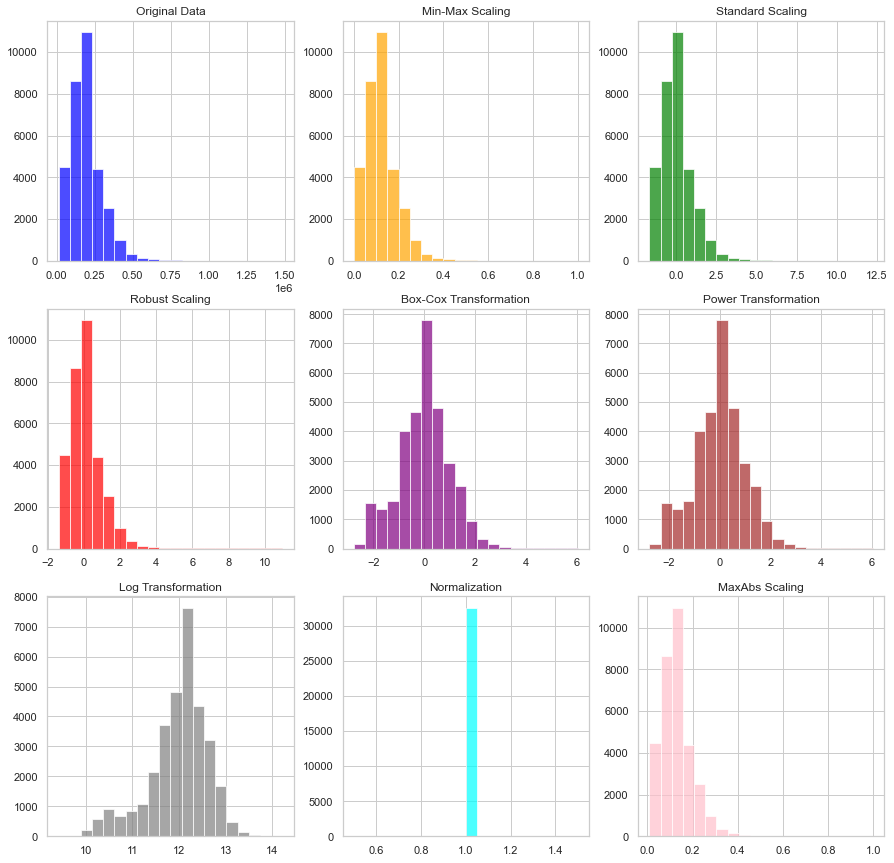

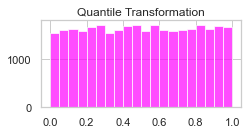

In [25]:
plot_transformations(census_income_2['Fnlwgt'])

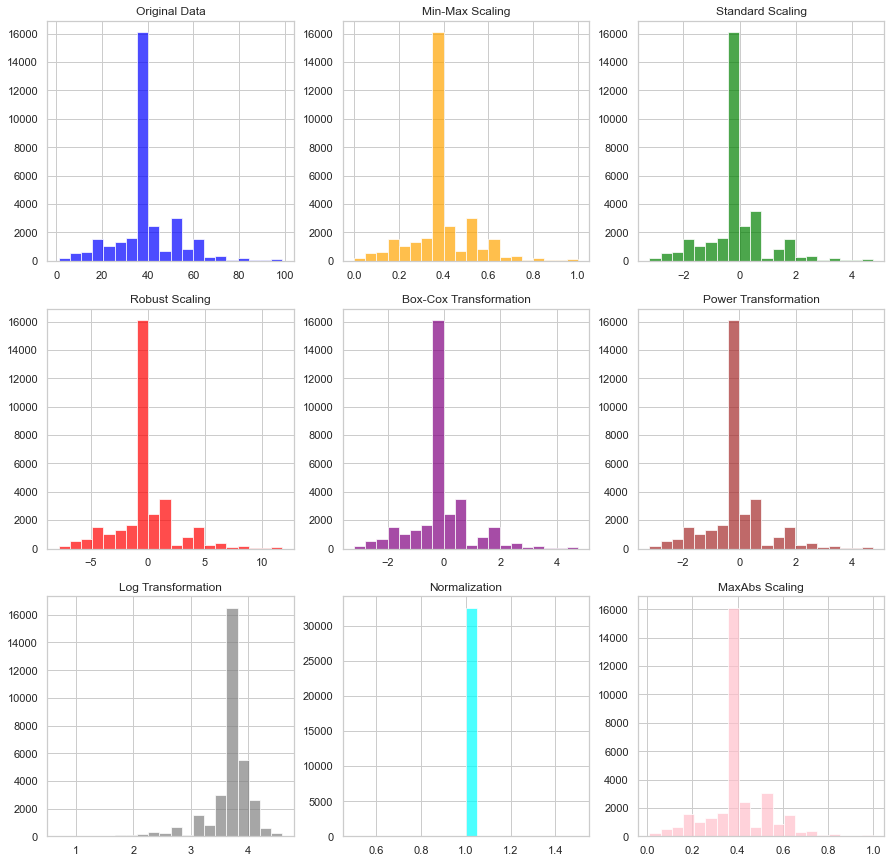

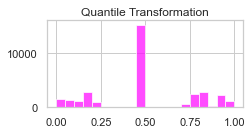

In [26]:
plot_transformations(census_income_2['Hours_per_week'])

In [27]:
boxcox_transformer = PowerTransformer(method='box-cox')
census_income_2['BoxCoxTransformed_Age'] = boxcox_transformer.fit_transform(census_income_2[['Age']])
census_income_2['BoxCoxTransformed_fnlwgt'] = boxcox_transformer.fit_transform(census_income_2[['Fnlwgt']])
census_income_2['BoxCoxTransformed_hours_per_week'] = boxcox_transformer.fit_transform(census_income_2[['Hours_per_week']])
census_income_2

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,BoxCoxTransformed_Age,BoxCoxTransformed_fnlwgt,BoxCoxTransformed_hours_per_week
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Spouse,White,Male,0,0,13,United-States,<=50K,0.891503,-1.089888,-2.221043
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0.103216,0.398742,-0.035681
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Spouse,Black,Male,0,0,40,United-States,<=50K,1.063790,0.562540,-0.035681
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Spouse,Black,Female,0,0,40,Cuba,<=50K,-0.730689,1.340398,-0.035681
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Spouse,White,Female,0,0,40,United-States,<=50K,0.028608,0.957182,-0.035681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Spouse,White,Female,0,0,38,United-States,<=50K,-0.827068,0.746749,-0.197664
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Spouse,White,Male,0,0,40,United-States,>50K,0.247694,-0.193298,-0.035681
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,1.333822,-0.219755,-0.035681
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,-1.358523,0.271668,-1.654836


In [28]:
print("Age : ")
print("Mean = ", statistics.mean(census_income_2['BoxCoxTransformed_Age']))
print("Standard Deviation = ", statistics.stdev(census_income_2['BoxCoxTransformed_Age']))

print()
print("Fnlwgt : ")
print("Mean = ", statistics.mean(census_income_2['BoxCoxTransformed_fnlwgt']))
print("Standard Deviation = ", statistics.stdev(census_income_2['BoxCoxTransformed_fnlwgt']))

print()
print("Hours per week : ")
print("Mean = ", statistics.mean(census_income_2['BoxCoxTransformed_hours_per_week']))
print("Standard Deviation = ", statistics.stdev(census_income_2['BoxCoxTransformed_hours_per_week']))

Age : 
Mean =  -1.3786384503287865e-16
Standard Deviation =  1.0000153566190877

Fnlwgt : 
Mean =  2.9248837095073185e-16
Standard Deviation =  1.0000153566190877

Hours per week : 
Mean =  -2.8244707964776573e-16
Standard Deviation =  1.0000153566190877


## Inferential Analysis

In [29]:
def t_test_significance(group1, group2, alpha=0.05):
    """
    Perform an independent t-test to assess the significance of a numerical variable with respect to a categorical variable.

    Parameters:
    - group1: NumPy array or Pandas Series representing the numerical values for category 1.
    - group2: NumPy array or Pandas Series representing the numerical values for category 2.
    - alpha: Significance level (default is 0.05).

    Returns:
    - t_statistic: The t-statistic from the t-test.
    - p_value: The p-value from the t-test.
    - significance: A string indicating whether the feature is significant or not.
    """
    t_statistic, p_value = stats.ttest_ind(group1, group2, equal_var=False)

    # Determine significance
    if p_value < alpha:
        significance = "Significant"
    else:
        significance = "Not Significant"

    return t_statistic, p_value, significance

# Example usage:
# Assuming you have a DataFrame 'df' with numerical column 'NumericFeature' and categorical column 'Category'
group1 = census_income_2[census_income_2['Income'] == ' <=50K']['BoxCoxTransformed_Age']
group2 = census_income_2[census_income_2['Income'] == ' >50K']['BoxCoxTransformed_Age']

t_stat, p_val, sig = t_test_significance(group1, group2)

print("Age")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")
print(f"Significance: {sig}")

group1 = census_income_2[census_income_2['Income'] == ' <=50K']['BoxCoxTransformed_fnlwgt']
group2 = census_income_2[census_income_2['Income'] == ' >50K']['BoxCoxTransformed_fnlwgt']

t_stat, p_val, sig = t_test_significance(group1, group2)

print()
print("Fnlwgt")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")
print(f"Significance: {sig}")

group1 = census_income_2[census_income_2['Income'] == ' <=50K']['BoxCoxTransformed_hours_per_week']
group2 = census_income_2[census_income_2['Income'] == ' >50K']['BoxCoxTransformed_hours_per_week']

t_stat, p_val, sig = t_test_significance(group1, group2)

print()
print("Hours per week")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")
print(f"Significance: {sig}")

Age
T-statistic: -60.75497727413461
P-value: 0.0
Significance: Significant

Fnlwgt
T-statistic: 0.9601695428865528
P-value: 0.3369870020928515
Significance: Not Significant

Hours per week
T-statistic: -45.11406831134507
P-value: 0.0
Significance: Significant


In [30]:
def chi_square_test_significance(contingency_table, alpha=0.05):
    """
    Perform a chi-square test to assess the significance of a categorical variable with respect to another categorical variable.

    Parameters:
    - contingency_table: Pandas DataFrame representing the contingency table of the two categorical variables.
    - alpha: Significance level (default is 0.05).

    Returns:
    - chi_squared: The chi-squared statistic from the test.
    - p_value: The p-value from the test.
    - significance: A string indicating whether the feature is significant or not.
    """
    chi_squared, p_value, _, _ = stats.chi2_contingency(contingency_table)

    # Determine significance
    if p_value < alpha:
        significance = "Significant"
    else:
        significance = "Not Significant"

    return chi_squared, p_value, significance

# Example usage:
# Assuming you have a DataFrame 'df' with categorical columns 'Category1' and 'Category2'
contingency_table = pd.crosstab(census_income_2['Workclass'], census_income_2['Income'])

chi_squared, p_val, sig = chi_square_test_significance(contingency_table)

print('Workclass')
print(f"Chi-squared statistic: {chi_squared}")
print(f"P-value: {p_val}")
print(f"Significance: {sig}")

print()
contingency_table = pd.crosstab(census_income_2['Education'], census_income_2['Income'])

chi_squared, p_val, sig = chi_square_test_significance(contingency_table)

print('Education')
print(f"Chi-squared statistic: {chi_squared}")
print(f"P-value: {p_val}")
print(f"Significance: {sig}")

print()
contingency_table = pd.crosstab(census_income_2['Marital_status'], census_income_2['Income'])

chi_squared, p_val, sig = chi_square_test_significance(contingency_table)

print('Marital status')
print(f"Chi-squared statistic: {chi_squared}")
print(f"P-value: {p_val}")
print(f"Significance: {sig}")

print()
contingency_table = pd.crosstab(census_income_2['Occupation'], census_income_2['Income'])

chi_squared, p_val, sig = chi_square_test_significance(contingency_table)

print('Occupation')
print(f"Chi-squared statistic: {chi_squared}")
print(f"P-value: {p_val}")
print(f"Significance: {sig}")

print()
contingency_table = pd.crosstab(census_income_2['Relationship'], census_income_2['Income'])

chi_squared, p_val, sig = chi_square_test_significance(contingency_table)

print('Relationship')
print(f"Chi-squared statistic: {chi_squared}")
print(f"P-value: {p_val}")
print(f"Significance: {sig}")

print()
contingency_table = pd.crosstab(census_income_2['Native_country'], census_income_2['Income'])

chi_squared, p_val, sig = chi_square_test_significance(contingency_table)

print('Native country')
print(f"Chi-squared statistic: {chi_squared}")
print(f"P-value: {p_val}")
print(f"Significance: {sig}")

Workclass
Chi-squared statistic: 821.0130931761573
P-value: 5.415549223792143e-173
Significance: Significant

Education
Chi-squared statistic: 4430.1842949937545
P-value: 0.0
Significance: Significant

Marital status
Chi-squared statistic: 6517.299336300969
P-value: 0.0
Significance: Significant

Occupation
Chi-squared statistic: 3594.821584502773
P-value: 0.0
Significance: Significant

Relationship
Chi-squared statistic: 6693.271328291872
P-value: 0.0
Significance: Significant

Native country
Chi-squared statistic: 310.58418062941774
P-value: 1.4470607719890292e-43
Significance: Significant


## Feature Selection

In [31]:
exclude_columns = ['Capital_gain', 'Capital_loss', 'Race', 'Sex', 'Fnlwgt', 'Age', 'Hours_per_week', 'BoxCoxTransformed_fnlwgt']
census_income_3 = census_income_2.drop(columns=exclude_columns)
census_income_3

,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Native_country,Income,BoxCoxTransformed_Age,BoxCoxTransformed_hours_per_week
0,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Spouse,United-States,<=50K,0.891503,-2.221043
1,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,United-States,<=50K,0.103216,-0.035681
2,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Spouse,United-States,<=50K,1.063790,-0.035681
3,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Spouse,Cuba,<=50K,-0.730689,-0.035681
4,Private,Masters,14,Married-civ-spouse,Exec-managerial,Spouse,United-States,<=50K,0.028608,-0.035681
...,...,...,...,...,...,...,...,...,...,...
32555,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Spouse,United-States,<=50K,-0.827068,-0.197664
32556,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Spouse,United-States,>50K,0.247694,-0.035681
32557,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,United-States,<=50K,1.333822,-0.035681
32558,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,United-States,<=50K,-1.358523,-1.654836


## Data Preparation

In [32]:
census_income_4 = census_income_3.copy()

onehot_encoded = pd.get_dummies(census_income_4['Workclass'], prefix='Workclass')
census_income_4 = pd.concat([census_income_4, onehot_encoded], axis=1)
onehot_encoded = pd.get_dummies(census_income_4['Marital_status'], prefix='Marital_status')
census_income_4 = pd.concat([census_income_4, onehot_encoded], axis=1)
onehot_encoded = pd.get_dummies(census_income_4['Occupation'], prefix='Occupation')
census_income_4 = pd.concat([census_income_4, onehot_encoded], axis=1)
onehot_encoded = pd.get_dummies(census_income_4['Relationship'], prefix='Relationship')
census_income_4 = pd.concat([census_income_4, onehot_encoded], axis=1)
onehot_encoded = pd.get_dummies(census_income_4['Native_country'], prefix='Native_country')
census_income_4 = pd.concat([census_income_4, onehot_encoded], axis=1)
census_income_4['Income'] = census_income_4['Income'].replace(' <=50K', 0)
census_income_4['Income'] = census_income_4['Income'].replace(' >50K', 1)
census_income_4.drop(['Workclass', 'Marital_status', 'Occupation', 'Relationship', 'Native_country'], axis=1, inplace=True)
census_income_4

,Education,Education_num,Income,BoxCoxTransformed_Age,BoxCoxTransformed_hours_per_week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,...,Native_country_ Portugal,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia
0,Bachelors,13,0,0.891503,-2.221043,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,HS-grad,9,0,0.103216,-0.035681,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,11th,7,0,1.063790,-0.035681,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,Bachelors,13,0,-0.730689,-0.035681,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Masters,14,0,0.028608,-0.035681,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,Assoc-acdm,12,0,-0.827068,-0.197664,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
32556,HS-grad,9,1,0.247694,-0.035681,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
32557,HS-grad,9,0,1.333822,-0.035681,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
32558,HS-grad,9,0,-1.358523,-1.654836,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [33]:
census_income_4 = census_income_4.drop(columns='Education')
census_income_4

,Education_num,Income,BoxCoxTransformed_Age,BoxCoxTransformed_hours_per_week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,...,Native_country_ Portugal,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia
0,13,0,0.891503,-2.221043,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,9,0,0.103216,-0.035681,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,7,0,1.063790,-0.035681,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,13,0,-0.730689,-0.035681,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,14,0,0.028608,-0.035681,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,12,0,-0.827068,-0.197664,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
32556,9,1,0.247694,-0.035681,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,9,0,1.333822,-0.035681,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,9,0,-1.358523,-1.654836,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [36]:
X = census_income_4.drop('Income', axis=1)
y = census_income_4['Income']

stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)


# Perform the split
for train_index, test_index in stratified_split.split(X, y):
    xtrain, xtest = X.iloc[train_index], X.iloc[test_index]
    ytrain, ytest = y.iloc[train_index], y.iloc[test_index]

# Display the resulting datasets
print("Training Set:")
print(pd.concat([xtrain, ytrain], axis=1))

print("\nTesting Set:")
print(pd.concat([xtest, ytest], axis=1))

Training Set:
       Education_num  BoxCoxTransformed_Age  BoxCoxTransformed_hours_per_week  \
15737             13              -0.371518                          0.369331   
3526               9              -1.135042                         -0.035681   
30412             10               0.584393                         -0.035681   
16505             10              -1.476620                         -1.978427   
14061             10              -1.029019                         -0.035681   
...              ...                    ...                               ...   
2771              10              -1.599455                         -0.440616   
15873             10              -0.371518                         -0.035681   
16256              9              -1.727468                          0.126315   
31864              2              -0.827068                         -0.035681   
9882               9               0.453612                         -0.035681   

       Workcl

In [37]:
census_income_5 = census_income_3.drop(columns='Education_num')
census_income_5

,Workclass,Education,Marital_status,Occupation,Relationship,Native_country,Income,BoxCoxTransformed_Age,BoxCoxTransformed_hours_per_week
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Spouse,United-States,<=50K,0.891503,-2.221043
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,United-States,<=50K,0.103216,-0.035681
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Spouse,United-States,<=50K,1.063790,-0.035681
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Spouse,Cuba,<=50K,-0.730689,-0.035681
4,Private,Masters,Married-civ-spouse,Exec-managerial,Spouse,United-States,<=50K,0.028608,-0.035681
...,...,...,...,...,...,...,...,...,...
32555,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Spouse,United-States,<=50K,-0.827068,-0.197664
32556,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Spouse,United-States,>50K,0.247694,-0.035681
32557,Private,HS-grad,Widowed,Adm-clerical,Unmarried,United-States,<=50K,1.333822,-0.035681
32558,Private,HS-grad,Never-married,Adm-clerical,Own-child,United-States,<=50K,-1.358523,-1.654836


In [38]:
X = census_income_5.drop('Income', axis=1)
y = census_income_5['Income']

stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)


# Perform the split
for train_index, test_index in stratified_split.split(X, y):
    xtrain_1, xtest_1 = X.iloc[train_index], X.iloc[test_index]
    ytrain_1, ytest_1 = y.iloc[train_index], y.iloc[test_index]

# Display the resulting datasets
print("Training Set:")
print(pd.concat([xtrain_1, ytrain_1], axis=1))

print("\nTesting Set:")
print(pd.concat([xtest_1, ytest_1], axis=1))

Training Set:
        Workclass      Education          Marital_status          Occupation  \
15737     Private      Bachelors      Married-civ-spouse     Exec-managerial   
3526      Private        HS-grad      Married-civ-spouse   Handlers-cleaners   
30412     Private   Some-college      Married-civ-spouse    Transport-moving   
16505     Private   Some-college           Never-married        Adm-clerical   
14061     Private   Some-college           Never-married        Adm-clerical   
...           ...            ...                     ...                 ...   
2771      Private   Some-college           Never-married       Other-service   
15873     Private   Some-college                Divorced     Exec-managerial   
16256     Private        HS-grad           Never-married        Adm-clerical   
31864     Private        1st-4th           Never-married        Craft-repair   
9882    Local-gov        HS-grad   Married-spouse-absent     Farming-fishing   

         Relationship  Na

## Machine Learning Modelling

## Logistic Regression

In [327]:
clf = LogisticRegression()
clf.fit(xtrain, ytrain)
ypred = clf.predict(xtest)
print("Training Accuracy = ",clf.score(xtrain, ytrain))
print("Testing Accuracy = ", accuracy_score(ytest, ypred))
print()
print(classification_report(ytest, ypred))

Training Accuracy =  0.8328854422604423
Testing Accuracy =  0.8370700245700246

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4944
           1       0.71      0.55      0.62      1568

    accuracy                           0.84      6512
   macro avg       0.79      0.74      0.76      6512
weighted avg       0.83      0.84      0.83      6512



C:\Users\Dev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Decision Tree

In [330]:
clf = DecisionTreeClassifier()
clf.fit(xtrain, ytrain)
ypred = clf.predict(xtest)
print("Training Accuracy = ",clf.score(xtrain, ytrain))
print("Testing Accuracy = ", accuracy_score(ytest, ypred))
print()
print(classification_report(ytest, ypred))

Training Accuracy =  0.9624923218673219
Testing Accuracy =  0.7862407862407862

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      4944
           1       0.56      0.53      0.54      1568

    accuracy                           0.79      6512
   macro avg       0.71      0.70      0.70      6512
weighted avg       0.78      0.79      0.78      6512



## Random Forest

In [334]:
clf = RandomForestClassifier()
clf.fit(xtrain, ytrain)
ypred = clf.predict(xtest)
print("Training Accuracy = ",clf.score(xtrain, ytrain))
print("Testing Accuracy = ", accuracy_score(ytest, ypred))
print()
print(classification_report(ytest, ypred))

Training Accuracy =  0.9623771498771498
Testing Accuracy =  0.8217137592137592

              precision    recall  f1-score   support

           0       0.87      0.90      0.89      4944
           1       0.65      0.56      0.60      1568

    accuracy                           0.82      6512
   macro avg       0.76      0.73      0.74      6512
weighted avg       0.81      0.82      0.82      6512



## Support Vector Machine

In [40]:
clf = svm.SVC()
clf.fit(xtrain, ytrain)
ypred = clf.predict(xtest)
print("Training Accuracy = ",clf.score(xtrain, ytrain))
print("Testing Accuracy = ", accuracy_score(ytest, ypred))
print()
print(classification_report(ytest, ypred))

Training Accuracy =  0.8288544226044227
Testing Accuracy =  0.8321560196560197

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      4944
           1       0.74      0.47      0.57      1568

    accuracy                           0.83      6512
   macro avg       0.79      0.71      0.73      6512
weighted avg       0.82      0.83      0.82      6512



## XGBoost

In [43]:
clf = xgboost.XGBClassifier()
clf.fit(xtrain, ytrain)
ypred = clf.predict(xtest)
print("Training Accuracy = ",clf.score(xtrain, ytrain))
print("Testing Accuracy = ", accuracy_score(ytest, ypred))
print()
print(classification_report(ytest, ypred))

Training Accuracy =  0.8640586609336609
Testing Accuracy =  0.8444410319410319

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4944
           1       0.71      0.60      0.65      1568

    accuracy                           0.84      6512
   macro avg       0.79      0.76      0.78      6512
weighted avg       0.84      0.84      0.84      6512



## XGBRF Classifier

In [44]:
clf = xgboost.XGBRFClassifier()
clf.fit(xtrain, ytrain)
ypred = clf.predict(xtest)
print("Training Accuracy = ",clf.score(xtrain, ytrain))
print("Testing Accuracy = ", accuracy_score(ytest, ypred))
print()
print(classification_report(ytest, ypred))

Training Accuracy =  0.8331541769041769
Testing Accuracy =  0.8290847665847666

              precision    recall  f1-score   support

           0       0.85      0.95      0.89      4944
           1       0.73      0.46      0.57      1568

    accuracy                           0.83      6512
   macro avg       0.79      0.70      0.73      6512
weighted avg       0.82      0.83      0.81      6512



## Grid Search CV

## Support Vector Machine

In [53]:
svc = svm.SVC()

# Define the hyperparameter grid to search
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', verbose=3)

# Fit the GridSearchCV object to the data
grid_search.fit(xtrain, ytrain)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Cross-Validated Accuracy: {:.2f}".format(grid_search.best_score_))

# Get the best model
best_svc = grid_search.best_estimator_

# Make predictions on the test set
ypred = best_svc.predict(xtest)

# Evaluate the accuracy on the test set
print("Training Accuracy = ",clf.score(xtrain, ytrain))
print("Testing Accuracy = ", accuracy_score(ytest, ypred))
print()
print(classification_report(ytest, ypred))

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5] END C=0.1, degree=2, gamma=scale, kernel=linear;, score=0.827 total time=  23.0s
[CV 2/5] END C=0.1, degree=2, gamma=scale, kernel=linear;, score=0.830 total time=  24.1s


KeyboardInterrupt: 

## Logistic Regression

In [55]:
svc = LogisticRegression()

# Define the hyperparameter grid to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}


# Create the GridSearchCV object
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', verbose=3)

# Fit the GridSearchCV object to the data
grid_search.fit(xtrain, ytrain)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Cross-Validated Accuracy: {:.2f}".format(grid_search.best_score_))

# Get the best model
best_svc = grid_search.best_estimator_

# Make predictions on the test set
ypred = best_svc.predict(xtest)

# Evaluate the accuracy on the test set
print("Testing Accuracy = ", accuracy_score(ytest, ypred))
print()
print(classification_report(ytest, ypred))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.754 total time=   0.0s
[CV 2/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.756 total time=   0.0s
[CV 3/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.748 total time=   0.0s
[CV 4/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.750 total time=   0.0s
[CV 5/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.753 total time=   0.0s
[CV 1/5] END ..C=0.001, penalty=l1, solver=saga;, score=0.807 total time=   1.1s
[CV 2/5] END ..C=0.001, penalty=l1, solver=saga;, score=0.812 total time=   1.5s
[CV 3/5] END ..C=0.001, penalty=l1, solver=saga;, score=0.812 total time=   1.4s
[CV 4/5] END ..C=0.001, penalty=l1, solver=saga;, score=0.812 total time=   1.3s
[CV 5/5] END ..C=0.001, penalty=l1, solver=saga;, score=0.815 total time=   1.3s
[CV 1/5] END C=0.001, penalty=l2, solver=liblinear;, score=0.790 total time=   0.0s
[CV 2/5] END C=0.001, penalty

C:\Users\Dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ....C=0.1, penalty=l1, solver=saga;, score=0.834 total time=   1.9s


C:\Users\Dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ....C=0.1, penalty=l1, solver=saga;, score=0.829 total time=   1.9s


C:\Users\Dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ....C=0.1, penalty=l1, solver=saga;, score=0.837 total time=   1.9s


C:\Users\Dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ....C=0.1, penalty=l1, solver=saga;, score=0.825 total time=   1.9s


C:\Users\Dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ....C=0.1, penalty=l1, solver=saga;, score=0.829 total time=   1.9s
[CV 1/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.833 total time=   0.0s
[CV 2/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.831 total time=   0.0s
[CV 3/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.838 total time=   0.0s
[CV 4/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.826 total time=   0.0s
[CV 5/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.829 total time=   0.0s


C:\Users\Dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ....C=0.1, penalty=l2, solver=saga;, score=0.834 total time=   1.6s


C:\Users\Dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ....C=0.1, penalty=l2, solver=saga;, score=0.830 total time=   1.6s


C:\Users\Dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ....C=0.1, penalty=l2, solver=saga;, score=0.837 total time=   1.6s


C:\Users\Dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ....C=0.1, penalty=l2, solver=saga;, score=0.826 total time=   1.6s


C:\Users\Dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ....C=0.1, penalty=l2, solver=saga;, score=0.829 total time=   1.5s
[CV 1/5] END .C=1, penalty=l1, solver=liblinear;, score=0.834 total time=   1.8s
[CV 2/5] END .C=1, penalty=l1, solver=liblinear;, score=0.831 total time=   1.6s
[CV 3/5] END .C=1, penalty=l1, solver=liblinear;, score=0.836 total time=   1.6s
[CV 4/5] END .C=1, penalty=l1, solver=liblinear;, score=0.827 total time=   1.7s
[CV 5/5] END .C=1, penalty=l1, solver=liblinear;, score=0.829 total time=   1.6s


C:\Users\Dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ......C=1, penalty=l1, solver=saga;, score=0.834 total time=   1.9s


C:\Users\Dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ......C=1, penalty=l1, solver=saga;, score=0.831 total time=   1.9s


C:\Users\Dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ......C=1, penalty=l1, solver=saga;, score=0.836 total time=   1.9s


C:\Users\Dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ......C=1, penalty=l1, solver=saga;, score=0.827 total time=   1.9s


C:\Users\Dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ......C=1, penalty=l1, solver=saga;, score=0.829 total time=   1.9s
[CV 1/5] END .C=1, penalty=l2, solver=liblinear;, score=0.835 total time=   0.0s
[CV 2/5] END .C=1, penalty=l2, solver=liblinear;, score=0.832 total time=   0.0s
[CV 3/5] END .C=1, penalty=l2, solver=liblinear;, score=0.837 total time=   0.0s
[CV 4/5] END .C=1, penalty=l2, solver=liblinear;, score=0.826 total time=   0.0s
[CV 5/5] END .C=1, penalty=l2, solver=liblinear;, score=0.829 total time=   0.0s


C:\Users\Dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ......C=1, penalty=l2, solver=saga;, score=0.834 total time=   1.5s


C:\Users\Dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ......C=1, penalty=l2, solver=saga;, score=0.831 total time=   1.6s


C:\Users\Dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ......C=1, penalty=l2, solver=saga;, score=0.836 total time=   1.5s


C:\Users\Dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ......C=1, penalty=l2, solver=saga;, score=0.826 total time=   1.6s


C:\Users\Dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ......C=1, penalty=l2, solver=saga;, score=0.830 total time=   1.6s
[CV 1/5] END C=10, penalty=l1, solver=liblinear;, score=0.835 total time=   0.8s
[CV 2/5] END C=10, penalty=l1, solver=liblinear;, score=0.831 total time=   1.1s
[CV 3/5] END C=10, penalty=l1, solver=liblinear;, score=0.836 total time=   1.7s
[CV 4/5] END C=10, penalty=l1, solver=liblinear;, score=0.826 total time=   0.7s
[CV 5/5] END C=10, penalty=l1, solver=liblinear;, score=0.829 total time=   1.4s


C:\Users\Dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END .....C=10, penalty=l1, solver=saga;, score=0.834 total time=   1.9s


C:\Users\Dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END .....C=10, penalty=l1, solver=saga;, score=0.831 total time=   2.0s


C:\Users\Dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END .....C=10, penalty=l1, solver=saga;, score=0.836 total time=   2.0s


C:\Users\Dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END .....C=10, penalty=l1, solver=saga;, score=0.827 total time=   2.0s


C:\Users\Dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END .....C=10, penalty=l1, solver=saga;, score=0.830 total time=   1.9s
[CV 1/5] END C=10, penalty=l2, solver=liblinear;, score=0.834 total time=   0.0s
[CV 2/5] END C=10, penalty=l2, solver=liblinear;, score=0.831 total time=   0.0s
[CV 3/5] END C=10, penalty=l2, solver=liblinear;, score=0.836 total time=   0.0s
[CV 4/5] END C=10, penalty=l2, solver=liblinear;, score=0.826 total time=   0.0s
[CV 5/5] END C=10, penalty=l2, solver=liblinear;, score=0.829 total time=   0.0s


C:\Users\Dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END .....C=10, penalty=l2, solver=saga;, score=0.834 total time=   1.6s


C:\Users\Dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END .....C=10, penalty=l2, solver=saga;, score=0.831 total time=   1.6s


C:\Users\Dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END .....C=10, penalty=l2, solver=saga;, score=0.836 total time=   1.6s


C:\Users\Dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END .....C=10, penalty=l2, solver=saga;, score=0.827 total time=   1.5s


C:\Users\Dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END .....C=10, penalty=l2, solver=saga;, score=0.830 total time=   1.5s
[CV 1/5] END C=100, penalty=l1, solver=liblinear;, score=0.834 total time=   0.0s
[CV 2/5] END C=100, penalty=l1, solver=liblinear;, score=0.831 total time=   0.1s
[CV 3/5] END C=100, penalty=l1, solver=liblinear;, score=0.836 total time=   0.0s
[CV 4/5] END C=100, penalty=l1, solver=liblinear;, score=0.826 total time=   0.0s
[CV 5/5] END C=100, penalty=l1, solver=liblinear;, score=0.829 total time=   0.1s


C:\Users\Dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ....C=100, penalty=l1, solver=saga;, score=0.834 total time=   2.0s


C:\Users\Dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ....C=100, penalty=l1, solver=saga;, score=0.831 total time=   2.0s


C:\Users\Dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ....C=100, penalty=l1, solver=saga;, score=0.836 total time=   1.9s


C:\Users\Dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ....C=100, penalty=l1, solver=saga;, score=0.827 total time=   2.0s


C:\Users\Dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ....C=100, penalty=l1, solver=saga;, score=0.829 total time=   2.0s
[CV 1/5] END C=100, penalty=l2, solver=liblinear;, score=0.834 total time=   0.0s
[CV 2/5] END C=100, penalty=l2, solver=liblinear;, score=0.831 total time=   0.0s
[CV 3/5] END C=100, penalty=l2, solver=liblinear;, score=0.836 total time=   0.1s
[CV 4/5] END C=100, penalty=l2, solver=liblinear;, score=0.826 total time=   0.0s
[CV 5/5] END C=100, penalty=l2, solver=liblinear;, score=0.830 total time=   0.0s


C:\Users\Dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ....C=100, penalty=l2, solver=saga;, score=0.834 total time=   1.6s


C:\Users\Dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ....C=100, penalty=l2, solver=saga;, score=0.831 total time=   1.6s


C:\Users\Dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ....C=100, penalty=l2, solver=saga;, score=0.836 total time=   1.6s


C:\Users\Dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ....C=100, penalty=l2, solver=saga;, score=0.827 total time=   1.5s
[CV 5/5] END ....C=100, penalty=l2, solver=saga;, score=0.829 total time=   1.5s
Best Parameters:  {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-Validated Accuracy: 0.83
Testing Accuracy =  0.8361486486486487

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4944
           1       0.70      0.55      0.62      1568

    accuracy                           0.84      6512
   macro avg       0.79      0.74      0.76      6512
weighted avg       0.83      0.84      0.83      6512



C:\Users\Dev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


## XGBoost 

In [60]:
xgb_model = xgboost.XGBClassifier()

# Define the hyperparameter grid to search
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(xgb_model, param_grid, cv=3, scoring='accuracy', verbose=3)

# Fit the GridSearchCV object to the data
grid_search.fit(xtrain, ytrain)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Cross-Validated Accuracy: {:.2f}".format(grid_search.best_score_))

# Get the best model
best_xgb_model = grid_search.best_estimator_

# Make predictions on the test set
ypred = best_xgb_model.predict(xtest)

print("Testing Accuracy = ", accuracy_score(ytest, ypred))
print()
print(classification_report(ytest, ypred))

Fitting 3 folds for each of 243 candidates, totalling 729 fits
[CV 1/3] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8;, score=0.818 total time=   0.1s
[CV 2/3] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8;, score=0.825 total time=   0.1s
[CV 3/3] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8;, score=0.817 total time=   0.2s
[CV 1/3] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.9;, score=0.818 total time=   0.1s
[CV 2/3] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.9;, score=0.825 total time=   0.1s
[CV 3/3] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.9;, score=0.817 total time=   0.1s
[CV 1/3] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0;, score=0.818 total time=   0.1s
[CV 2/3] END 